In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import torch
import torch.nn as nn

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)

In [2]:
num_points = 25#50
X1 = np.linspace(-2.5, 1.5, num_points)
X2 = np.linspace(-2, 4, num_points)
X1, X2 = np.meshgrid(X1, X2)
Y = np.sin(np.sqrt(X1**2 + X2**2))*2-1.

####Scaling the data to range -1,1
X1 = 2*(X1 - X1.min())/(X1.max() - X1.min()) -1
X2 = 2*(X2 - X2.min())/(X2.max() - X2.min()) -1
Y = 2*(Y - Y.min())/(Y.max() - Y.min()) -1

x1 = X1.reshape(-1)
x2 = X2.reshape(-1)

xx = torch.Tensor(np.c_[x1, x2])

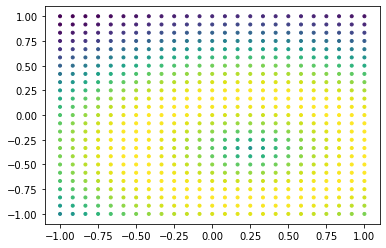

In [3]:
# %matplotlib inline
plt.scatter(X1, X2, marker='.', c=Y)
plt.show()

## Interactive plot two Relu

In [4]:
W1 = torch.Tensor([[1, 1], [-1, 1]])
W2 = torch.Tensor([[1, 0],
                   [0, 1]])

W12 = None
W = torch.eye(2)
torch.manual_seed(123)
flow = torch.randn(2)
flow = flow/torch.norm(flow)

In [5]:
_a = widgets.FloatSlider(W[0,0], min=-3, max=3, step=0.1, continuous_update=False, description='W_00')
_b = widgets.FloatSlider(W[0,1], min=-3, max=3, step=0.1, continuous_update=False, description='W_01')
_c = widgets.FloatSlider(W[1,0], min=-3, max=3, step=0.1, continuous_update=False, description='W_10')
_d = widgets.FloatSlider(W[1,1], min=-3, max=3, step=0.1, continuous_update=False, description='W_11')

_e = widgets.FloatSlider(W1[0,0], min=-3, max=3, step=0.05, continuous_update=False, description='W1_00')
_f = widgets.FloatSlider(W1[0,1], min=-3, max=3, step=0.05, continuous_update=False, description='W1_01')
_g = widgets.FloatSlider(W1[1,0], min=-3, max=3, step=0.05, continuous_update=False, description='W1_10')
_h = widgets.FloatSlider(W1[1,1], min=-3, max=3, step=0.05, continuous_update=False, description='W1_11')


_i = widgets.FloatSlider(W2[0,0], min=-3, max=3, step=0.05, continuous_update=False, description='W2_00')
_j = widgets.FloatSlider(W2[0,1], min=-3, max=3, step=0.05, continuous_update=False, description='W2_01')
_k = widgets.FloatSlider(W2[1,0], min=-3, max=3, step=0.05, continuous_update=False, description='W2_10')
_l = widgets.FloatSlider(W2[1,1], min=-3, max=3, step=0.05, continuous_update=False, description='W2_11')


_row0 = widgets.HBox([_a, _b])
_row1 = widgets.HBox([_c, _d])
_ui_W = widgets.VBox([_row0, _row1])

_row0b = widgets.HBox([_e, _f])
_row1b = widgets.HBox([_g, _h])
_ui_W1 = widgets.VBox([_row0b, _row1b])

_row0c = widgets.HBox([_i, _j])
_row1c = widgets.HBox([_k, _l])
_ui_W2 = widgets.VBox([_row0c, _row1c])

_ui2 = widgets.VBox([_ui_W, _ui_W1, _ui_W2])


def interactive_function(a, b, c, d, e, f, g, h, i, j, k, l):
    global W, W1, W2, W12, yout, res
    %matplotlib inline
    plt.figure(figsize=(8,8))
    
    W = torch.FloatTensor([[a,b],[c,d]])
    W1 = torch.FloatTensor([[e, f],[g, h]])
    W1 = W1/torch.norm(W1, dim=0, keepdim=True)
    W2 = torch.FloatTensor([[i,j], [k, l]])
    W12 = torch.matmul(W1, W2)
    print(W12)    
    with torch.no_grad():
        lin = torch.matmul(xx, W)
        res = torch.matmul(xx, W1)
        res = nn.functional.relu(res)
        res = torch.matmul(res, W2)
        yout = lin+res+xx
    
    y1, y2 = yout[:,0].numpy().reshape(X1.shape), yout[:,1].numpy().reshape(X1.shape)
    
    plt.scatter(y1, y2, c=Y, marker='o')
    plt.plot(y1, y2, lw=0.5)
    plt.plot(y1.T, y2.T, c='k', lw=0.5)
    
    plt.scatter(X1, X2, c=Y, marker='.', alpha=0.5)
    plt.plot(X1, X2, c='k', lw=0.5, alpha=0.5)
    plt.plot(X1.T, X2.T, c='k', lw=0.5, alpha=0.5)
    
    
    ## x-axis
    plt.plot(y1[12,:], y2[12,:], c='k', lw=2)
    x, y, tx, ty = y1[12,12], y2[12,12], y1[24,12], y2[24,12]
    u, v = tx-x, ty-y
    plt.arrow(x, y, u, v, lw=2, color='r', head_starts_at_zero=True, width=0.01)
    plt.arrow(x, y, flow[0], flow[1], lw=2, color='r', head_starts_at_zero=True, width=0.01)
    
    plt.plot(y1[:,12], y2[:,12], c='k', lw=2)
    plt.axis([-1.2, 1.2, -1.2, 1.2])
    
    plt.show()

    

interactive_plot = widgets.interactive_output(interactive_function,
                                              {
                                               'a': _a, 'b': _b, 'c': _c, 'd': _d,
                                               'e': _e, 'f': _f, 'g': _g, 'h': _h,
                                               'i': _i, 'j': _j, 'k': _k, 'l': _l}
                                             )

display(_ui2, interactive_plot)

Output()

In [184]:
W

tensor([[ 0.4000,  0.1000],
        [-0.1000,  0.8000]])

In [185]:
flow

tensor([-0.6795,  0.7337])

In [186]:
W12

tensor([[-0.4043,  0.6564],
        [ 1.0155, -0.9397]])

In [187]:
torch.matmul(W.reshape(-1),(W12+W).reshape(-1))

tensor(-0.1294)

In [188]:
## changes in x0x1 due to x0
W[0]

tensor([0.4000, 0.1000])

In [189]:
(W12+W)[0]

tensor([-0.0043,  0.7564])

In [190]:
torch.matmul(W[0],(W12+W)[0]), torch.matmul(W[1],(W12+W)[1])

(tensor(0.0739), tensor(-0.2033))

In [191]:
torch.matmul(W[:,0],(W12+W)[:,0]), torch.matmul(W[:,1],(W12+W)[:,1])

(tensor(-0.0933), tensor(-0.0361))

In [192]:
W12

tensor([[-0.4043,  0.6564],
        [ 1.0155, -0.9397]])

In [193]:
u,d,v = np.linalg.svd(W12+W+torch.eye(2))
ev = np.matmul(u, np.diag(d))[:,0]

In [194]:
ev

array([-1.2487587, -1.2545818], dtype=float32)

In [196]:
d

array([1.7701337, 0.0927129], dtype=float32)